In [11]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from skimage.feature import hog
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:


def get_processed_data(folder_path, img_size=64, n_components=0.95):
    """
    Legge le immagini, applica CLAHE, estrae HOG e comprime con PCA.
    Ritorna X (feature compresse) e y (etichette).
    """
    features_raw = []
    labels = []
    
    # Per migliorare il contrasto
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    all_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"1. Estrazione HOG da {len(all_files)} immagini...")
    for filename in tqdm(all_files):
        label = filename.split('_')[0]
        
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            continue
            
        # Preprocessing: Resize + CLAHE
        img_res = cv2.resize(img, (img_size, img_size))
        img_eq = clahe.apply(img_res)
        
        # Estrazione HOG (orientations=9 è lo standard per i bordi)
        # Questo riduce l'immagine a un vettore di descrittori di forma
        feat = hog(img_eq, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), visualize=False)
        
        features_raw.append(feat)
        labels.append(label)
    
    X_raw = np.array(features_raw)
    y = np.array(labels)
    
    print(f"2. Applicazione PCA (mantenendo il {n_components*100}% della varianza)...")
    
    # Scaling obbligatorio prima della PCA
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_raw)

    
    scaler2 = MinMaxScaler()


    # PCA per ridurre le dimensioni
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    
    X_pca_scaled = scaler2.fit_transform(X_pca)

    print(f"Finito! Feature originali: {X_raw.shape[1]} -> Ridotte a: {X_pca.shape[1]}")
    
    return X_pca_scaled, y

# --- ESECUZIONE ---
PATH = "/home/mattia/Desktop/unige/ml2/machineLearning2_Assignment/training-a-robot-to-understand-sign-language/signlanguage/signlanguage"
X, y = get_processed_data(PATH)
print(X.shape)
print(y.shape)
Xl, Xt, yl, yt = train_test_split(X, y, test_size=0.2, random_state=11)

1. Estrazione HOG da 8492 immagini...


100%|██████████| 8492/8492 [00:09<00:00, 879.29it/s]


2. Applicazione PCA (mantenendo il 95.0% della varianza)...
Finito! Feature originali: 1764 -> Ridotte a: 453
(8476, 453)
(8476,)


In [20]:
grid = {'C':                       np.logspace(-6,3,10),
        'kernel':                  ['linear'],
        'decision_function_shape': ['ovr']}
M = GridSearchCV(estimator  = SVC(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'balanced_accuracy',
                 n_jobs = 20)
M.fit(Xl, yl)
yp = M.predict(Xt)
perr = 100*np.mean(yp != yt)
print('%Err: ' +  str(perr))
print('%CM:\n ' +  str(confusion_matrix(yt,yp)))


%Err: 1.5330188679245282
%CM:
 [[ 73   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0 113   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  50   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  54   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  69   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3  54   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   1   

In [ ]:
grid = {'C':                       np.logspace(-6,3,10),
        'kernel':                  ['linear'],
        'decision_function_shape': ['ovr']}
M = GridSearchCV(estimator  = SVC(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'balanced_accuracy',
                 n_jobs = 20)
M.fit(Xl, yl)
yp = M.predict(Xt)
perr = 100*np.mean(yp != yt)
print('%Err: ' +  str(perr))
print('%CM:\n ' +  str(confusion_matrix(yt,yp)))


In [10]:
print(X)

[[ 1.61306547e+01  4.87198800e+00 -6.11830241e+00 ...  2.26909456e-01
  -1.43996754e+00 -6.08089051e-01]
 [ 1.03820712e+01 -6.90163509e-01 -7.97213753e+00 ...  7.86898815e-02
  -4.10928468e-01  6.76812588e-01]
 [ 1.72003486e+01  2.32341755e+00 -1.61403460e+01 ...  6.27159162e-01
  -2.51732074e-01 -4.60123471e-01]
 ...
 [-1.31180658e+01 -1.29956769e+01 -1.68482166e+00 ...  4.82119387e-01
  -7.16464991e-02 -5.07869332e-01]
 [ 8.16078329e+00  1.55765570e+00  4.34777758e+00 ... -6.40935970e-01
   9.76610246e-01 -4.73542465e-01]
 [-6.49207961e+00  1.65012586e+01  1.77113875e+01 ... -9.97020141e-03
  -2.15750772e-01 -3.10775020e-01]]


In [17]:
grid = {'C':                       np.logspace(-6,3,10),
        'kernel':                  ['rbf'],
        'gamma':                   np.logspace(-6,3,10),
        'decision_function_shape': ['ovr']}
M = GridSearchCV(estimator  = SVC(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy',
                 n_jobs=-1,
                 verbose=10)
M.fit(Xl, yl)
yp = M.predict(Xt)
perr = 100*np.mean(yp != yt)
print('%Err: ' +  str(perr))
print('%CM:\n ' +  str(confusion_matrix(yt,yp)))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 7/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf
[CV 1/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf
[CV 3/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf
[CV 8/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf
[CV 9/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf
[CV 6/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf
[CV 10/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf
[CV 4/10; 2/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-05, kernel=rbf
[CV 3/10; 2/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-05, kernel=rbf[CV 2/10; 2/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-05, kernel=rbf

[CV 5/10; 1/100] START C=1e-06, decision_function_shape=ovr, gamma=1e-06, kernel=rbf

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import plot_tree
def quality(M,XT,YT):
  Yp = M.predict(XT)
  print('ACC: ' + format(accuracy_score(YT,Yp),".3f"))
  print('BAC: ' + format(balanced_accuracy_score(YT,Yp),".3f"))
  print('CM: \n' + str(confusion_matrix(YT,Yp)))

max_depth best: 34
ACC: 0.794
BAC: 0.796
CM: 
[[52  2  0  0  0  3  0  1  0  2  0  0  5  1  0  0  1  1  0  1  0  1  1  0
   3]
 [ 2 81  0  1  0  0  1  0  0  1  2  0  3  0  3  0  2  1  2  3  1  3  5  1
   1]
 [ 1  1 83  3  2  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0
   0]
 [ 0  0  0 76  0  1  0  0  0  0  0  0  1  1  1  0  0  0  0  0  1  0  0  0
   0]
 [ 0  1  0  0 42  1  0  0  0  0  0  0  3  1  0  0  0  0  1  0  2  0  0  0
   0]
 [ 1  1  0  3  0 37  0  0  0  0  0  0  1  0  1  0  0  2  0  2  0  1  0  0
   1]
 [ 1  1  0  0  0  0 50  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   1]
 [ 1  0  0  0  0  0  0 58  8  0  0  0  0  1  0  0  0  0  1  0  1  0  0  0
   0]
 [ 1  0  0  0  0  1  1  7 47  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  1  1  1  1  0  0 54  2  0  1  2  0  0  0  0  1  0  2  1  0  0
   0]
 [ 1  0  1  0  2  0  0  0  0  0 53  2  2  1  1  0  0  1  0  0  3  0  1  0
   0]
 [ 0  2  2  0  1  0  0  1  1  0  1 54  0  0  0  0  0  0  0  0  1  0  0  1


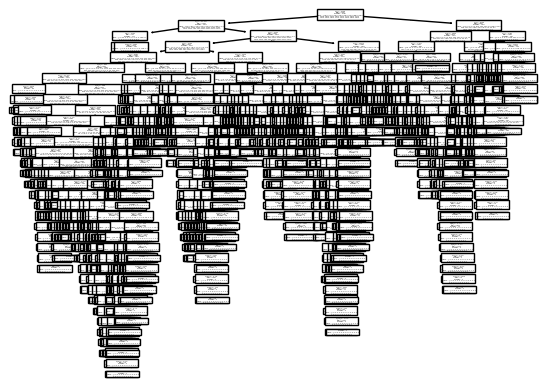

In [35]:
from sklearn.tree import DecisionTreeClassifier
grid = {'max_depth': [34, 36, 40,45, 50]}
M = GridSearchCV(estimator  = DecisionTreeClassifier(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy',
                 n_jobs=19)
M.fit(Xl,yl)
print('max_depth best: ' + str(M.best_params_['max_depth']))
plot_tree(M.best_estimator_)
quality(M,Xt,yt)

min_samples_leaf best: 8
ACC: 0.307
BAC: 0.312
CM: 
[[ 60   7   3   0   0   0   1   0   5   2   3   0  27   0  25   6   0   8
    8  12   3   7  10   3  12]
 [  1 167  28   1   0   0   0   0   0   3  25   0   5   0   6   0   1   7
    2   3   4   2   1  15   7]
 [  0  90  50  46   0   0   5   0   0   5   1   0   0   0  27  11   1   0
    0   0   0   0   0  13   4]
 [ 43  25  39  71   0   0   1   0   0   3   0   0   3   0  23   1   0   0
    0   0   0   0   2   4   7]
 [  9  21  41  18   0   0   3   0   0  16   0   0  14   0  12   0   0   0
    5   4   0   0   2  17   8]
 [  8  35   2   0   0   0   0   0   0   2   6   0  14   0   4   0   0   0
    5   2  14   4  13  23  14]
 [  3  45   0   2   0   0  78   0   0   8   0   0   4   0   5  10   2   0
    0   0   1   0  12   4  16]
 [ 41  26   2   1   0   0   0   0  57   0   2   0  21   0   1   0   0   0
   10   0   1   1   4   2   6]
 [  3   8   4   5   0   0   0   0 148   0   1   0   7   0   1   0   0   0
    1   0   0   0   2   2   0]
 [ 

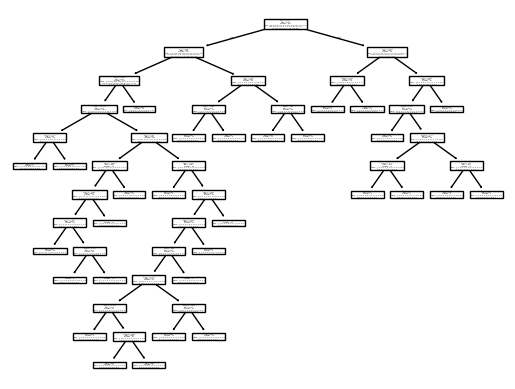

In [21]:
from sklearn.tree import DecisionTreeClassifier
grid = {'min_samples_leaf': [2,4,6,8,12,16,20,30]}
M = GridSearchCV(estimator  = DecisionTreeClassifier(),
                 param_grid = grid,
                 cv         = 3,
                 scoring    = 'accuracy')
M.fit(X,Y)
print('min_samples_leaf best: ' + str(M.best_params_['min_samples_leaf']))
plot_tree(M.best_estimator_)
quality(M,XT,YT)

In [22]:
from sklearn.ensemble import RandomForestClassifier
M = RandomForestClassifier(n_estimators=300)
M.fit(X,Y)
quality(M,XT,YT)

ACC: 0.569
BAC: 0.554
CM: 
[[105  10   3   2   0   0   0   0   9   0   8   0  55   2   2   0   0   0
    0   0   0   0   2   2   2]
 [  4 213   8  12   0   2   0   0   1   4  10   0  17   0   3   0   0   1
    0   0   1   1   0   1   0]
 [  0  45 161   7   1   0   0   0   0   1   4   0  25   1   1   0   0   5
    0   0   0   1   0   1   0]
 [  0   3   3 195   0   1   0   0   0   1   1   0   5   0  12   0   0   0
    0   0   0   0   0   1   0]
 [  3  12   4  12  44   1   0   0   3   3  34   0  30   2   8   0   0   1
    0   0   2   1   0  10   0]
 [  3  51   1  14   0  36   0   0   3   0   2   0  31   1   2   0   0   0
    0   0   0   0   2   0   0]
 [  5  49   5   0   0   2  79   0   0   8   6   0  24   0   3   0   0   1
    0   0   0   5   1   2   0]
 [  5   1   0   4   0   0   0   3 122   0   7   0  31   0   0   0   0   0
    0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 182   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  1  16   0   2   0   0   

In [37]:
from sklearn.ensemble import RandomForestClassifier
grid = {'n_estimators': [300],
        'max_features': [10,16,20,28,32,40]}
M = GridSearchCV(estimator  = RandomForestClassifier(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy',
                 n_jobs =20)
M.fit(Xl,yl)
print('n_estimators best: ' + str(M.best_params_['n_estimators']))
print('max_features best: ' + str(M.best_params_['max_features']))
quality(M,Xt,yt)

n_estimators best: 300
max_features best: 28
ACC: 0.976
BAC: 0.978
CM: 
[[ 74   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0 111   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  49   0   0   0   0   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  54   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  67   3   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  57   0   0   0   0   0   0   0   0   0
    0   0   0 

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
grid = {'n_estimators':  [50],
        'learning_rate': [.01, 0.05, .1, .5]}
M = GridSearchCV(estimator  = GradientBoostingClassifier(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy',
                 n_jobs=20)
M.fit(Xl,yl)
print('n_estimators best:  ' + str(M.best_params_['n_estimators']))
print('learning_rate best: ' + str(M.best_params_['learning_rate']))
quality(M,Xt,yt)

KeyboardInterrupt: 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors':  [1,3,5,7,9,11,15,19]}
M = GridSearchCV(estimator  = KNeighborsClassifier(),
                 param_grid = grid,
                 cv         = 3,
                 scoring    = 'accuracy')
M.fit(Xl,yl)
print('n_neighbors best: ' + str(M.best_params_['n_neighbors']))
quality(M,Xt,yt)

n_neighbors best: 1
ACC: 0.991
BAC: 0.991
CM: 
[[ 74   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0 111   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  49   0   0   0   0   1   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  50   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  55   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  69   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2  55   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   